In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Load the data
data_file = "new_india-fii-yeild.xlsx"
data = pd.read_excel(data_file)
data.columns = ["date", "fii", "yield"]
data["date"] = pd.to_datetime(data["date"])
data.set_index("date", inplace=True)

# Log transformation and differencing
data["log_fii"] = np.log(data["fii"])
data["log_yield"] = np.log(data["yield"])
data["log_diff_fii"] = data["log_fii"].diff()
data["log_diff_yield"] = data["log_yield"].diff()

# Drop the first row (NaN from differencing)
data = data.dropna()

e:\Rouhin Projects\Nityoday. Geetha. I RP\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


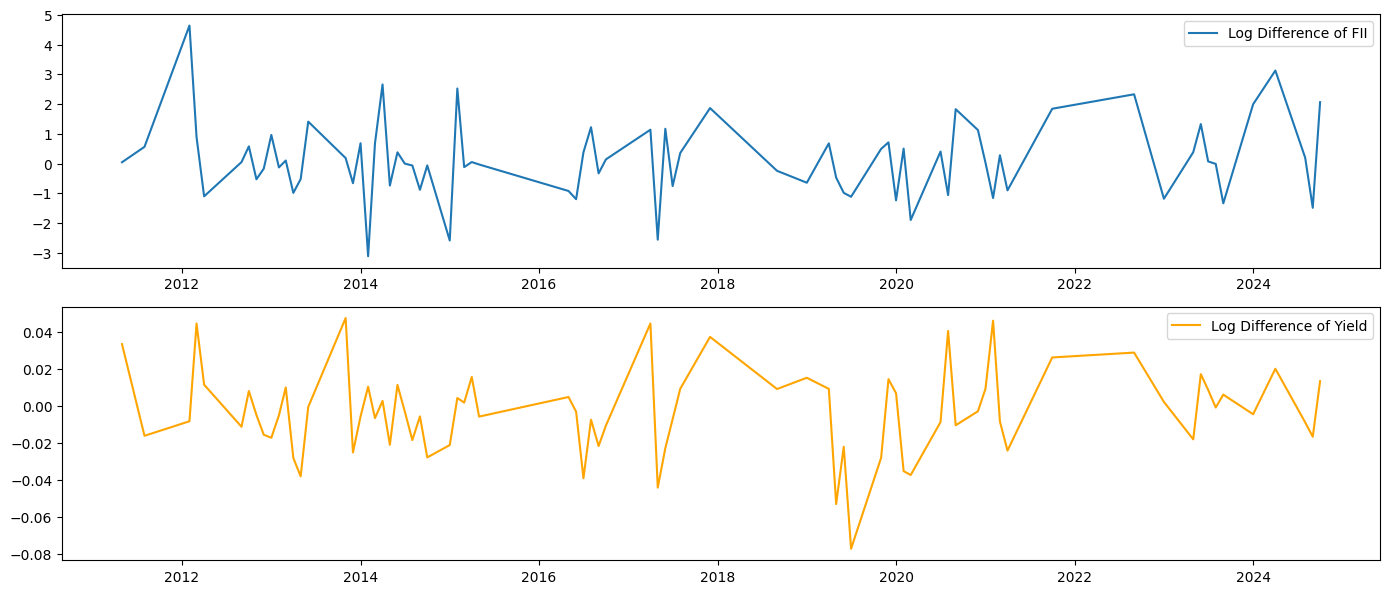

In [3]:
# Plot the log differences to visually inspect stationarity
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(data["log_diff_fii"], label="Log Difference of FII")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(data["log_diff_yield"], label="Log Difference of Yield", color="orange")
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# Perform Augmented Dickey-Fuller (ADF) test for stationarity
def adf_test(series, series_name):
    result = adfuller(series)
    print(f"ADF Test for {series_name}")
    print("Test Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    if result[1] < 0.05:
        print("The series is stationary.\n")
    else:
        print("The series is not stationary.\n")

adf_test(data["log_diff_fii"], "Log Difference of FII")
adf_test(data["log_diff_yield"], "Log Difference of Yield")

ADF Test for Log Difference of FII
Test Statistic: -1.2181094807700323
p-value: 0.6657573614849948
Critical Values:
	1%: -3.5319549603840894
	5%: -2.905755128523123
	10%: -2.5903569458676765
The series is not stationary.

ADF Test for Log Difference of Yield
Test Statistic: -6.810894348550857
p-value: 2.117693769334484e-09
Critical Values:
	1%: -3.5219803175527606
	5%: -2.9014701097664504
	10%: -2.58807215485756
The series is stationary.



In [5]:
# Calculate second log difference for 'fii_log_diff'
data['fii_log_diff2'] = data['fii_log_diff'].diff().dropna()

# Perform ADF test on second log difference of 'fii_log_diff'
adf_test(data['fii_log_diff2'].dropna(), "Second Log Difference of FII")

KeyError: 'fii_log_diff'